# Auto Dataset Analysis

This Jupyter Notebook provides an analysis of the Auto dataset focusing on predicting miles per gallon (mpg) using various features. The analysis includes correlation analysis, Principal Component Analysis (PCA), and regularization techniques (Ridge and Lasso Regression) to understand and predict fuel efficiency.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

data_set_df = pd.read_csv('Auto.csv')
data_set_df = data_set_df.drop(columns=['name'])

## Exploratory Data Analysis

We start by exploring the correlation between different features in the dataset.

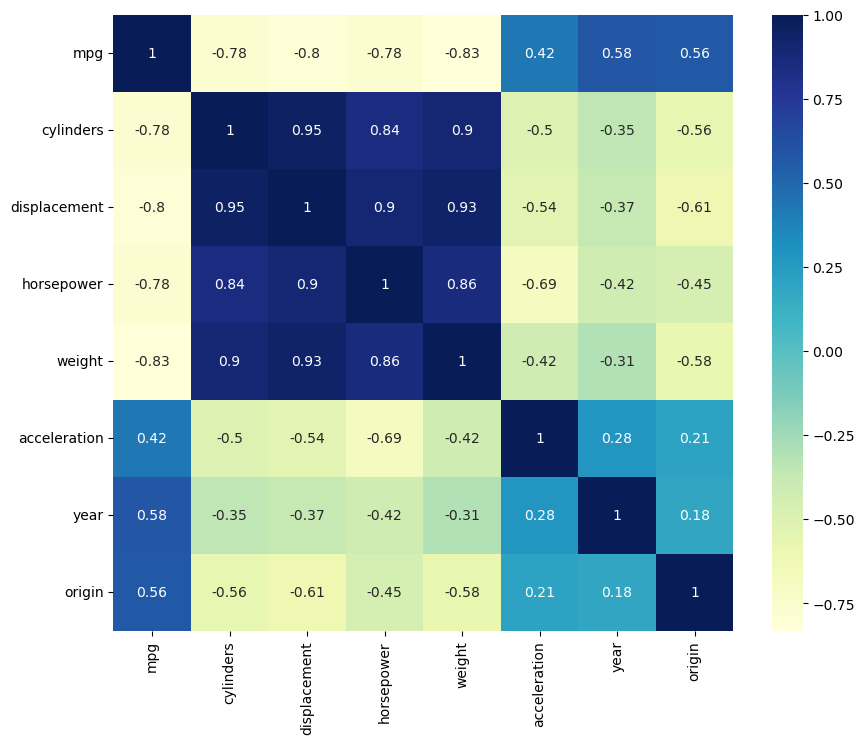

In [61]:
# Plotting correlations
fig = plt.figure(figsize=(10, 8));
sns.heatmap(data_set_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection and Multicollinearity Check

We focus on features with strong correlations to our target variable (mpg) and check for multicollinearity using the Variance Inflation Factor (VIF).

In [62]:
df_features = data_set_df[['cylinders', 'displacement', 'horsepower', 'weight']]
df_const = add_constant(df_features)

vif_df = pd.DataFrame()
vif_df["Feature"] = df_const.columns
vif_df["VIF"] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

vif_df

,Feature,VIF
0,const,50.865693
1,cylinders,10.613263
2,displacement,19.438728
3,horsepower,5.310544
4,weight,8.045760


## Principal Component Analysis (PCA)

To address multicollinearity and reduce dimensionality, we apply PCA.

In [63]:
# Standardizing features and applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# PCA to retain 95% of variance
pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

print("Anzahl der Hauptkomponenten:", pca.n_components_)
print("Erklärte Varianz durch die Hauptkomponenten:", pca.explained_variance_ratio_)

Anzahl der Hauptkomponenten: 2
Erklärte Varianz durch die Hauptkomponenten: [0.92333199 0.04200172]


## Linear Regression Model

A linear regression model is then trained on the PCA-transformed data.

In [64]:
y = data_set_df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=29)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 25.020373981681566
R^2 Score: 0.684056112343471


## Regularization with Ridge Regression

To further manage multicollinearity, we apply Ridge Regression.

In [65]:
y = data_set_df[['mpg']] 
X = data_set_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

### Model Evaluation 

After training, we predict the mpg values for the test set and evaluate the model performance using Mean Squared Error (MSE) and R^2 score

In [66]:
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13.108274531072482
R^2 Score: 0.7864040628317472


### Visualization
Finally, we visualize the importance of each feature in the model and compare the actual vs. predicted values

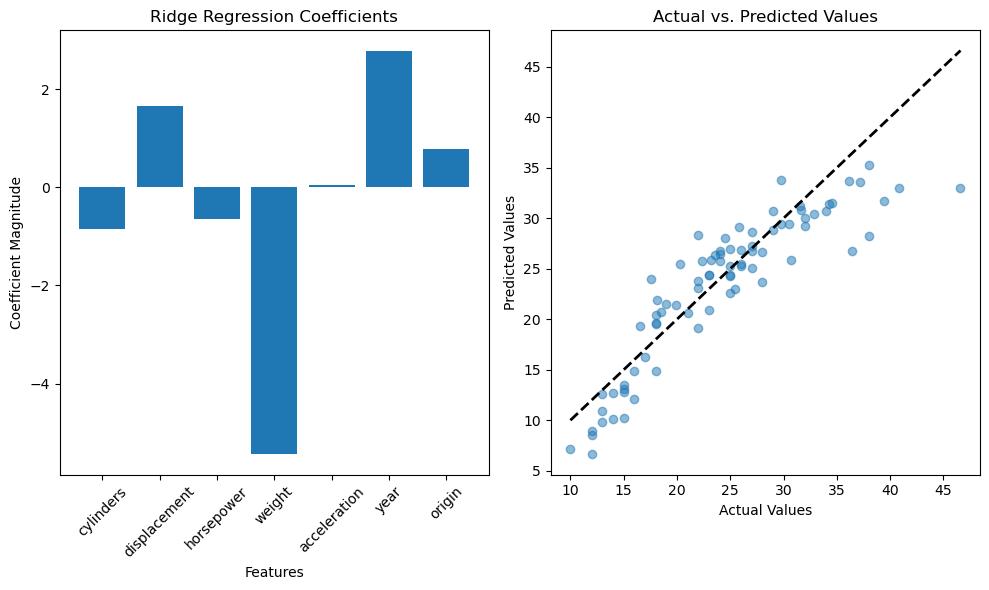

In [67]:
coefficients = ridge.coef_.flatten()
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45)
plt.title('Ridge Regression Coefficients')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

## Regularization with Lasso Regression

Lasso Regression is also employed for its ability to perform feature selection.

In [68]:
y = data_set_df[['mpg']] 
X = data_set_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

### Model Evaluation 

After training, we predict the mpg values for the test set and evaluate the model performance using Mean Squared Error (MSE) and R^2 score

In [69]:
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13.465322572004073
R^2 Score: 0.7805860575148695


### Visualization
Finally, we visualize the importance of each feature in the model and compare the actual vs. predicted values

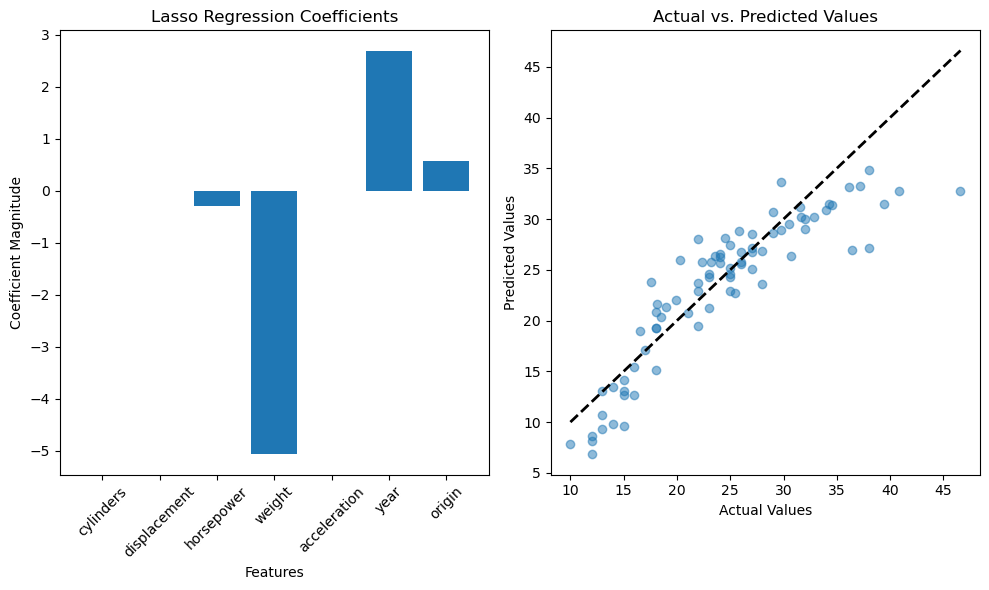

In [70]:
coefficients = lasso.coef_.flatten()
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=45)
plt.title('Lasso Regression Coefficients')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

## Detailed Conclusion

Throughout my analysis to predict fuel efficiency (MPG) accurately, i initially encountered the challenge of multicollinearity among predictors, highlighted through the Variance Inflation Factor (VIF). High VIF values indicated strong multicollinearity, which can significantly affect the stability and interpretability of regression models.

### Addressing Multicollinearity with VIF

My first step was to use VIF to identify and quantify multicollinearity in the dataset. This was crucial for understanding the interdependencies among predictors and informed our strategy for developing a reliable predictive model.

### Dimensionality Reduction with PCA

Given the multicollinearity, i proceeded with Principal Component Analysis (PCA) for dimensionality reduction. PCA aimed to mitigate multicollinearity by transforming the original predictors into a smaller set of uncorrelated components. However, the post-PCA model, yielding a Mean Squared Error (MSE) of 25.020373981681566 and an R^2 Score of 0.684056112343471, did not meet my expectations for predictive accuracy and model performance.

### Pursuing Enhanced Models with Ridge and Lasso Regression

Dissatisfied with the PCA results, i explored regularization techniques, specifically Ridge and Lasso Regression, to further refine the model. These techniques are known for their ability to handle multicollinearity and reduce overfitting by introducing penalties on the coefficients:

- **Ridge Regression** was selected to improve model generalizability by penalizing the magnitude of the coefficients. The Ridge approach significantly enhanced model performance, evidenced by a MSE of 13.108274531072482 and an R^2 Score of 0.7864040628317472.

- **Lasso Regression** was also employed for its capacity to penalize coefficients and perform feature selection by reducing some coefficients to zero. This resulted in a slightly different model with a MSE of 13.465322572004073 and an R^2 Score of 0.7805860575148695, indicating strong predictive power and a simpler model due to feature elimination.

### Conclusion

The decision to apply Ridge and Lasso Regression emerged directly from my dissatisfaction with the PCA results. Despite PCA's utility in addressing multicollinearity and reducing dimensionality, it was insufficient for achieving the desired level of model accuracy and interpretability. The subsequent application of Ridge and Lasso Regression was a strategic move to not only overcome the limitations observed with PCA but also to leverage regularization for improved model performance and accuracy. This approach underscores the importance of critically assessing model outcomes at each step and being open to exploring advanced techniques to achieve optimal results. My comprehensive methodology, beginning with VIF analysis, followed by PCA, and culminating in the application of Ridge and Lasso, exemplifies a dynamic and adaptive approach to predictive modeling, ensuring robustness, accuracy, and relevance in model development.
